In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [77]:
# csv file
file_path = '/Users/martinthuren/Desktop/Datamatiker - 4 semester/Business Intelligence/MP3/house-data.csv'

house = pd.read_csv(file_path, header=0)

# Define feature variables (X) and target variable (y)
X = house[['sqft_living', 'sqft_lot', 'bedrooms']]  
y = house['price']  

# Display the first few rows and column names
house.head()
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [78]:
# Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Check for missing values
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [80]:
# Check for duplicates
house.duplicated().sum()

# Remove duplicates
house = house.drop_duplicates()

In [81]:
# Handle missing values
house.dropna(inplace=True)

# Check for duplicates again after handling missing values
house.duplicated().sum()


0

In [82]:
# Statistical summary
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [83]:
# Print column names
print(house.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


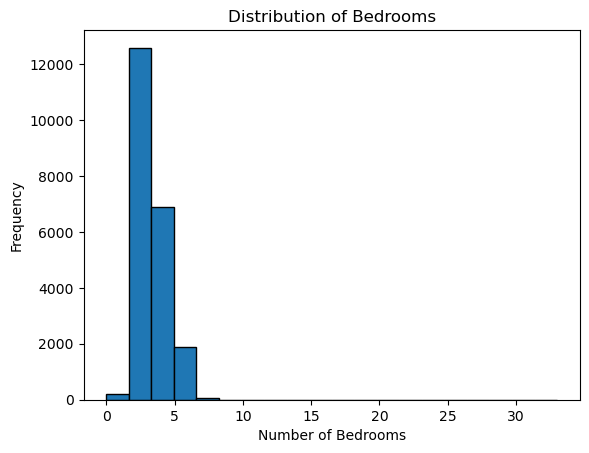

In [84]:
# Histogram of the 'bedrooms' column
plt.hist(house['bedrooms'], bins=20, edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.show()

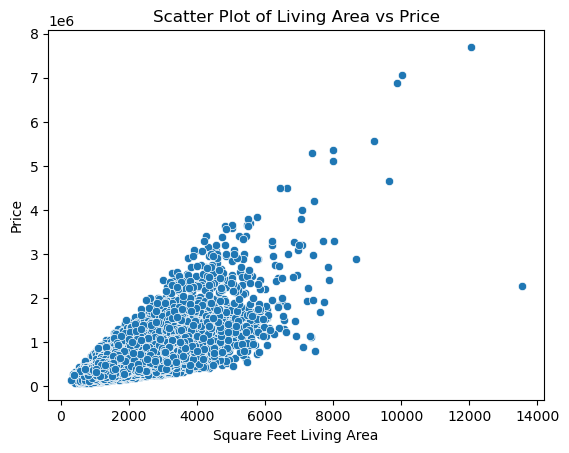

In [85]:
# Scatter plot of 'sqft_living' vs 'price'
sns.scatterplot(x='sqft_living', y='price', data=house)
plt.xlabel('Square Feet Living Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Living Area vs Price')
plt.show()

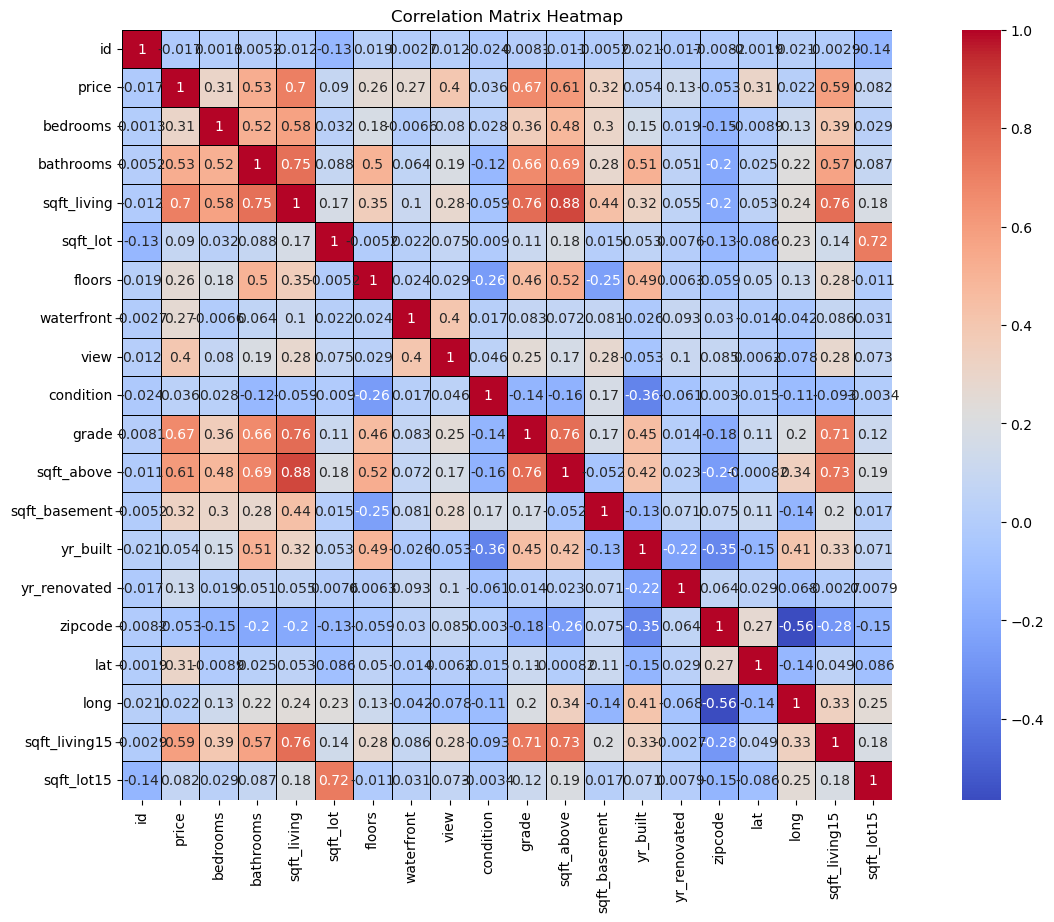

In [86]:
# Correlation matrix heatmap with larger boxes
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed
correlation_matrix = house.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [87]:
# data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

In [89]:
# Multiple Linear Regression
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)
y_pred_multi = multi_reg_model.predict(X_test)
rmse_multi = mean_squared_error(y_test, y_pred_multi, squared=False)
r2_multi = r2_score(y_test, y_pred_multi)

In [90]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_reg_model.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test_poly, y_pred_poly, squared=False)
r2_poly = r2_score(y_test_poly, y_pred_poly)

In [91]:
# printing the rmses and r-squared values
print(f"Simple Linear Regression RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Multiple Linear Regression RMSE: {rmse_multi}, R-squared: {r2_multi}")
print(f"Polynomial Regression RMSE: {rmse_poly}, R-squared: {r2_poly}")

Simple Linear Regression RMSE: 271972.0570321918, R-squared: 0.5107130013474219
Multiple Linear Regression RMSE: 271972.0570321918, R-squared: 0.5107130013474219
Polynomial Regression RMSE: 275696.4285298345, R-squared: 0.49722070569332144


In [92]:
# looking at the average price in the dataset in relation to the rmse
average_price = house['price'].mean()
print(f"The average price in the dataset is: {average_price}")

The average price in the dataset is: 540088.1417665294


In [93]:
# storing models for future use
if rmse_linear <= rmse_multi and rmse_linear <= rmse_poly:
    joblib.dump(linear_reg_model, 'best_regression_model.pkl')
elif rmse_multi <= rmse_linear and rmse_multi <= rmse_poly:
    joblib.dump(multi_reg_model, 'best_regression_model.pkl')
else:
    joblib.dump(poly_reg_model, 'best_regression_model.pkl')